In [1]:
# Funciones auxiliares
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.stats import boxcox
import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.svm as svm
import sklearn.neighbors as ng
import sklearn.naive_bayes as nb
import sklearn.model_selection as ms
import sklearn.preprocessing as prep
import sklearn.decomposition as de
import statsmodels.api as sm
if not(os.path.isdir("tarea")):
    mkdir("tarea")
def dataScaled(df):
    # Creating dictionary to store the different data frames
    data = {"original":df}
    # Standarizing data to have mean 0 and variance 1
    scaler = pr.StandardScaler()
    scaler.fit(df)
    data["standarized"] = pd.DataFrame(scaler.transform(df),index=df.index,columns=df.columns)
    # Centering data to have variance 1 
    scaler = pr.StandardScaler(with_mean=False)
    scaler.fit(df)
    data["withmean"] = pd.DataFrame(scaler.transform(df),index=df.index,columns=df.columns)
    return data
def correlationPlots(df,saveName="",cmap=cm.viridis_r,f=16,width=50,**kwargs):
    variables = [var for var in df.columns if np.issubdtype(df[var].dtype,np.number)]
    nvar = len(variables)
    values = [df[var].to_numpy() for var in variables]
    correlations = np.corrcoef(values)
    norm = mcolors.Normalize(vmin=-1,vmax=1)
    fig , ax = plt.subplots(ncols=nvar,nrows=nvar,figsize=(19,16),constrained_layout=True)
    for i in range(nvar):
        for j in range(nvar):
            if i!=j:
                ax[i][j].scatter(values[i],values[j],color=cmap(norm(correlations[i][j])),**kwargs)
                ax[i][j].grid()
        ax[0][i].set_title(str(variables[i]),fontsize=f)
        ax[i][nvar-1].yaxis.set_label_position("right")
        ax[i][nvar-1].set_ylabel(str(variables[i]),fontsize=f)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax.ravel().tolist(),aspect=width)
    cbar.ax.tick_params(labelsize=1.5*f)
    cbar.ax.yaxis.set_label_position("right")
    cbar.ax.set_ylabel("Correlation",fontsize=1.5*f)
    if bool(saveName):
        plt.savefig(os.path.join("tarea","{0}-correlation.pdf".format(saveName)))
    plt.show()

def classPlots(X,y,saveName="",cmap=cm.Dark2,f=16,width=50,**kwargs):
    variables = [var for var in X.columns if np.issubdtype(X[var].dtype,np.number)]
    nvar = len(variables)
    values = [X[var].to_numpy() for var in variables]
    classes = list(set(y))
    nclass = len(classes)
    norm = mcolors.Normalize(vmin=0,vmax=nclass-1)     
    colors = [cmap(norm(classes.index(clas))) for clas in y]
    fig , ax = plt.subplots(ncols=nvar,nrows=nvar,figsize=(19,16),constrained_layout=True)
    for i in range(nvar):
        for j in range(nvar):
            if i!=j:
                ax[i][j].scatter(values[i],values[j],color=colors,**kwargs)
                ax[i][j].grid()
        ax[0][i].set_title(str(variables[i]),fontsize=f)
        ax[i][nvar-1].yaxis.set_label_position("right")
        ax[i][nvar-1].set_ylabel(str(variables[i]),fontsize=f)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax.ravel().tolist(),aspect=width,ticks=range(nclass))
    cbar.ax.tick_params(labelsize=1.5*f)
    cbar.ax.yaxis.set_label_position("right")
    cbar.ax.set_ylabel("Class",fontsize=1.5*f)
    cbar.ax.set_yticklabels(classes)
    if bool(saveName):
        plt.savefig(os.path.join("tarea","{0}-classes.pdf".format(saveName)))
    plt.show()

def pcaPlots(X,y,saveName="",cmap=cm.Dark2,f=16,width=50,ncomps=0,**kwargs):
    variables = [var for var in X.columns if np.issubdtype(X[var].dtype,np.number)]
    nvar = len(variables)
    values = [X[var].to_numpy() for var in variables]
    aux = np.transpose(values)
    pca = de.PCA()
    pca.fit(aux)
    Z = pca.transform(aux)
    variables = ["PC{0}".format(i) for i in range(len(variables))]
    values = np.transpose(Z)
    classes = list(set(y))
    nclass = len(classes)
    norm = mcolors.Normalize(vmin=0,vmax=nclass-1)     
    colors = [cmap(norm(classes.index(clas))) for clas in y]
    if ncomps==0:
        ncomps=nvar
    fig , ax = plt.subplots(ncols=ncomps,nrows=ncomps,figsize=(19,16),constrained_layout=True)
    for i in range(ncomps):
        for j in range(ncomps):
            if i!=j:
                ax[i][j].scatter(values[i],values[j],color=colors,**kwargs)
                ax[i][j].grid()
        ax[0][i].set_title(str(variables[i]),fontsize=f)
        ax[i][nvar-1].yaxis.set_label_position("right")
        ax[i][nvar-1].set_ylabel(str(variables[i]),fontsize=f)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax.ravel().tolist(),aspect=width,ticks=range(nclass))
    cbar.ax.tick_params(labelsize=1.5*f)
    cbar.ax.yaxis.set_label_position("right")
    cbar.ax.set_ylabel("Class",fontsize=1.5*f)
    cbar.ax.set_yticklabels(classes)
    if bool(saveName):
        plt.savefig(os.path.join("tarea","{0}-pca.pdf".format(saveName)))
    plt.show()

    
def indVarDistPlots(df,resCol,saveName="",cmap=cm.Dark2,**kwargs):
    if not(resCol in df.columns):
        raise ValueError("Name {0} is not in columns".format(resCol))
    classes = list(set(df[resCol]))
    nclass = len(classes)
    norm = mcolors.Normalize(vmin=0,vmax=nclass-1)
    colors = [cmap(norm(i)) for i in range(nclass)]
    for col in df.columns:
        if col != resCol and np.issubdtype(df[col].dtype,np.number):
            fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(6,2.5))
            df.boxplot(column=col,by=resCol,ax=ax[0])
            for i,val in enumerate(classes):
                df[df[resCol]==val][col].hist(ax=ax[1],label=str(val),color=colors[i],**kwargs)
            ax[0].set_title("Boxplot")
            ax[1].legend()
            ax[1].set_title("Histogram")
            fig.suptitle("{0} distribution".format(col),y=1.1)
        elif col != resCol and (df[col].dtype == np.dtype('O')):
            fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,2.5))
            labels = [str(val) for val in set(df[resCol])]
            weights = [[1/df[df[resCol]==val][col].shape[0] for i in range(df[df[resCol]==val][col].shape[0])] for val in set(df[resCol])]
            weights = np.transpose(weights)
            ax.hist(np.transpose([df[df[resCol]==val][col].to_numpy() for val in set(df[resCol])]),
                    weights=weights,
                    label=labels,
                    color=colors,
                    **kwargs)
            ax.legend()
            ax.grid()
            ax.set_ylabel("Normed counts")
            ax.set_title("{0} histogram".format(col))
        elif col != resCol:
            print("Column {0} cannot be interpreted".format(col))
        if bool(saveName):
            plt.tight_layout()
            plt.savefig(os.path.join("tarea","{0}-{1}-dist.pdf".format(saveName,col)))
        plt.show()

def boxcoxLambdaTable(df,resCol,alpha=0.05):
    names = []
    lambdas = []
    intervalsBot = []
    intervalsTop = []
    for col in df.columns:
        if col != resCol and np.issubdtype(df[col].dtype,np.number):
            if (df[col]>0).prod():
                names.append(col)
                bx = boxcox(df[col],alpha=alpha)
                lambdas.append(bx[1])
                intervalsBot.append(bx[2][0])
                intervalsTop.append(bx[2][1])
            else:
                print("Can't convert column {0}: not entirely positive".format(col) )
    fin = pd.DataFrame.from_dict({"lambda":lambdas,"Lower confidence interval, alpha = {0}".format(alpha):intervalsBot,"Upper confidence interval, alpha = {0}".format(alpha):intervalsTop})
    fin.index = names
    return fin.transpose()

def errorRates(mod,X,y,n=100,size=0.5,equalRatios=False):
    fin = np.zeros(n)
    classes = list(set(y))
    perClass = [np.zeros(n) for val in classes]
    for i in range(n):
        if size<1.0:
            if equalRatios:
                X_train, X_test, y_train, y_test = ms.train_test_split(X,y,train_size=size,stratify=y)
            else:
                X_train, X_test, y_train, y_test = ms.train_test_split(X,y,train_size=size)
            fit = mod.fit(X_train,y_train)
            res = fit.predict(X_test)
            fin[i] = np.mean(y_test != res)
            for j,val in enumerate(classes):
                curr = X[y==val]
                res = fit.predict(curr)
                perClass[j][i] = np.mean(y[y==val] != res)
        elif size==1:
            fit = mod.fit(X,y)
            res = fit.predict(X)
            fin[i] = np.mean(y != res)
            for j,val in enumerate(classes):
                curr = X[y==val]
                res = fit.predict(curr)
                perClass[j][i] = np.mean(y[y==val] != res)
    final = [np.mean(fin),np.std(fin)] 
    for cla in perClass:
        final.append(np.mean(cla))
        final.append(np.std(cla))
    return final

def errorRatesTable(models,X,y,n=100,size=0.5,equalRatios=False,names=[]):
    if not bool(names):
        names = [str(mod).split("(")[0] for mod in models]
    elif len(names) != len(models):
        raise ValueError("length of names must match length of models")
    errors = [errorRates(mod,X,y,n=n,size=size,equalRatios=equalRatios) for mod in models]
    fin = pd.DataFrame(errors)
    fin.index = names
    cols = ["Mean global error","std"]
    classes = list(set(y))
    for i in range(len(classes)):
        cols.append("Mean {0} error".format(classes[i]))
        cols.append("std")
    fin.columns = cols
    return fin.transpose()

def errorRatesSizeTable(models,X,y,sizes,n=100,equalRatios=False,names=[]):
    tables = []
    indexes = []
    for i,size in enumerate(sizes):
        print("Simulating size: {0}".format(size))
        tab = errorRatesTable(models,X,y,n=n,size=size,equalRatios=equalRatios,names=names)
        tables.append(tab)
        newIndex = ["{0}, entrenamiento: {1}".format(name,np.round(sizes[i],decimals=2)) for name in tab.index]
        indexes.extend(newIndex)
    df = pd.concat(tables,ignore_index=True)    
    df.index = indexes
    return df

def errorRatesSizesPlot(errorTable,saveName="",f1=16,f2=14,**kwargs):
    sizes = [float(name.split(":")[-1]) for name in errorTable.index]
    sizes = list(set(sizes))
    nclass = int(errorTable.shape[0]/(2*len(sizes)))
    names = [name.split(" ")[1] for name in errorTable.index]
    names = [names[i] for i in range(0,2*nclass,2)]
    fig,ax = plt.subplots(nrows=nclass,ncols=1,sharex=True,figsize=(8,2.5*nclass))
    for col in errorTable.columns:
        for j in range(nclass):
            vals = errorTable.iloc[range(2*j,errorTable.shape[0],2*nclass)][col].to_numpy()
            stds = errorTable.iloc[range(2*j+1,errorTable.shape[0],2*nclass)][col].to_numpy()
            ax[j].errorbar(sizes,vals,yerr=stds,label=str(col),fmt="o",**kwargs)
            ax[j].grid(True)
            ax[j].set_ylabel("{0} error rate".format(names[j]),fontsize=f1)
            ax[j].tick_params(axis="both",labelsize=f2)
    ax[nclass-1].set_xlabel("Fraction used for training",fontsize=f1)
    ax[0].legend(bbox_to_anchor=(1,1),fontsize=f2)
    plt.subplots_adjust(hspace=0.05)
    if bool(saveName):
        plt.tight_layout()
        plt.savefig(os.path.join("tarea","{0}-sizeDependence.pdf".format(saveName)))
    plt.show()

def pairInteractionMin(df,resCol,model):
    transformed = df.copy()
    vals = []
    inters = []
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != resCol and col2!= resCol and col1!=col2:
                transformed["inter"] = transformed[col1]*transformed[col2]
                models = [model]
                names = ["LDA"]
                sizes=[1.0]
                res = errorRatesSizeTable(models,transformed.drop(resCol,axis=1),transformed[resCol],sizes=sizes,n=10,equalRatios=True)
                vals.append(res.iloc[0,0])
                inters.append(col1 + "*" + col2)
    m = np.argmin(vals)
    print("error minimizing interacion: {0}".format(inters[m]))
    print("Value: {0}".format(vals[m]))
    return inters[m].split("*")

def multinomialLogisticRegressionClassifier(X,y,reference,**kwargs):
    classes = list(set(y))
    nclasses = len(classes)
    classifiers = []
    newY = y.astype("category").cat.codes
    refCode = newY[y==reference].iloc[0]
    newY = (newY - refCode) % nclasses
    newY.name = y.name
    conversion = {}
    for c in classes:
        code = newY[y==c].iloc[0]
        conversion.update({c:code})
    mod = sm.MNLogit(exog=X,endog=newY)
    fit = mod.fit(maxiters=10**5)
    return conversion,fit

In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/aldo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [107]:
# Problema 1
df = pd.read_csv("pimate.csv")
df = df.append(pd.read_csv("pimatr.csv"),ignore_index=True)
print(df.head())

   npreg  glu  bp  skin   bmi    ped  age type
0      5   86  68    28  30.2  0.364   24   No
1      7  195  70    33  25.1  0.163   55  Yes
2      5   77  82    41  35.8  0.156   35   No
3      0  165  76    43  47.9  0.259   26   No
4      0  107  60    25  26.4  0.133   23   No


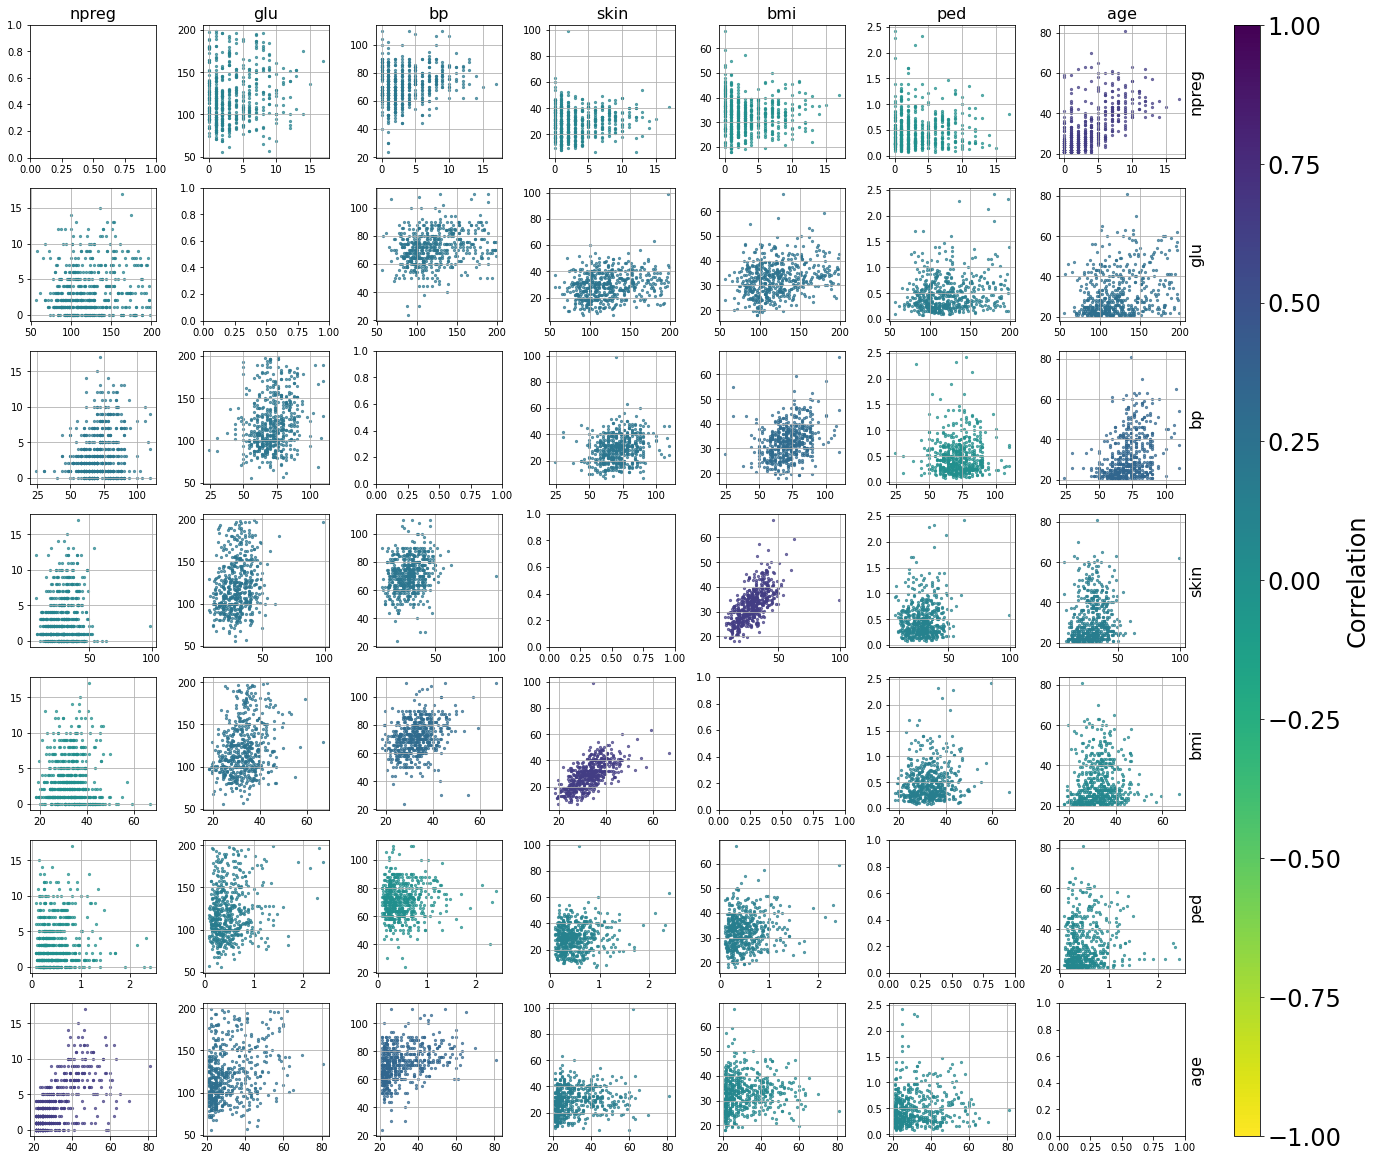

In [3]:
correlationPlots(df,saveName="1",alpha=0.7,s=5)

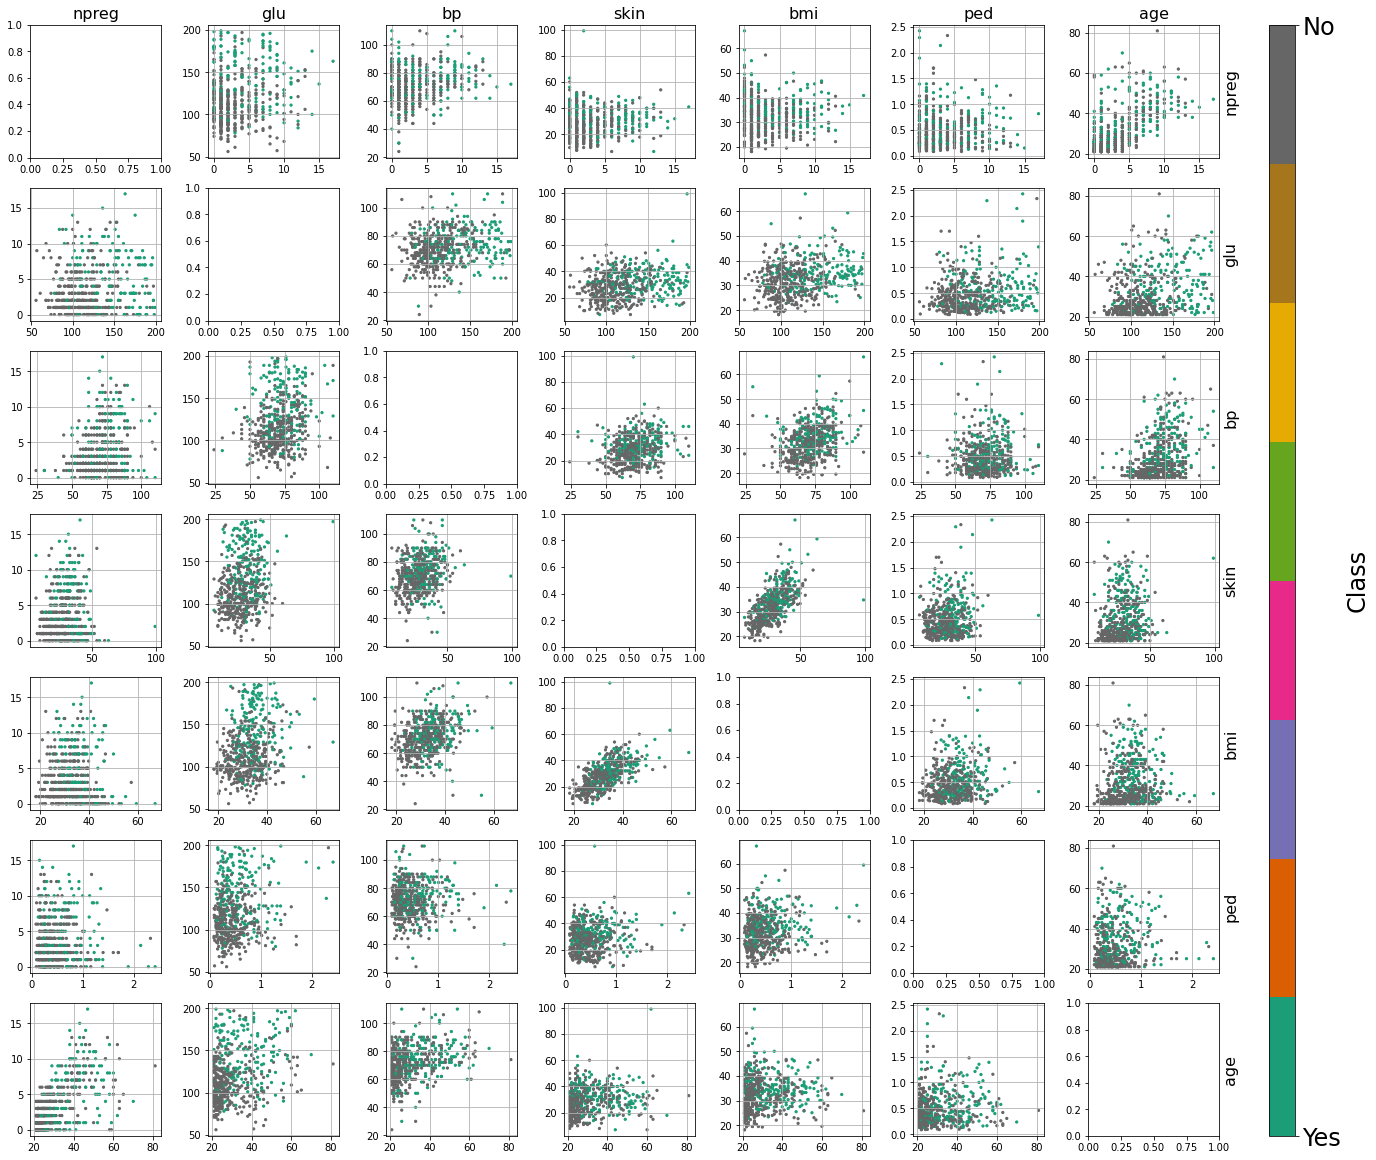

In [4]:
classPlots(df.drop("type",axis=1),df["type"],saveName="1",s=5)

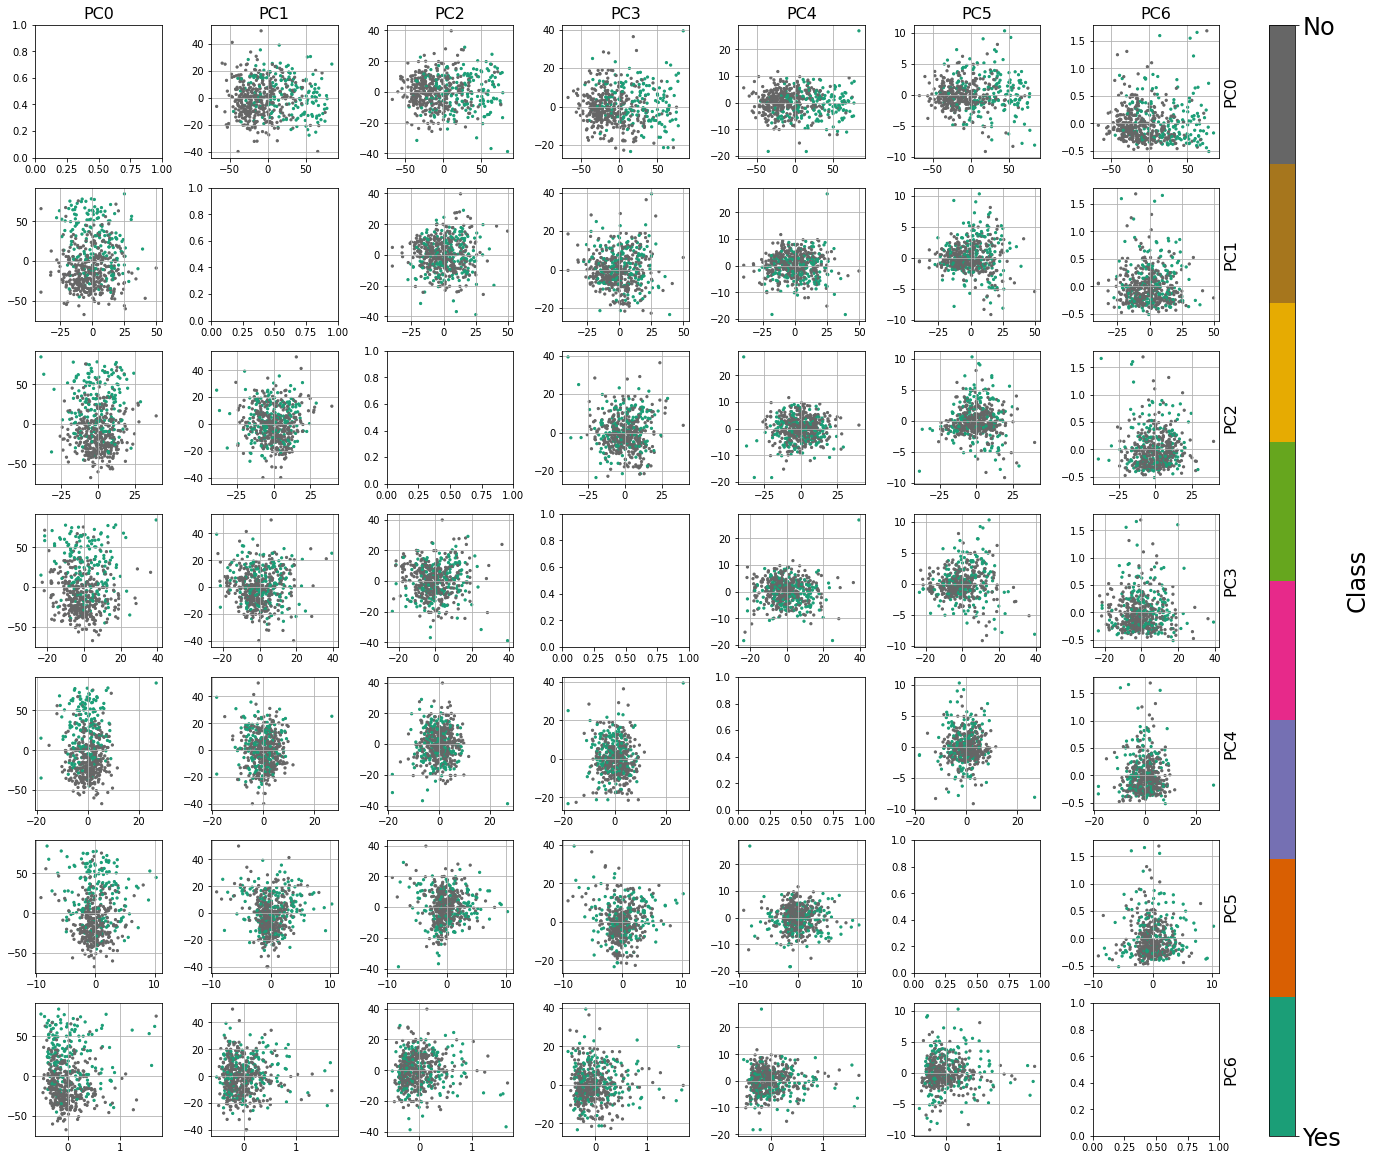

In [5]:
pcaPlots(df.drop("type",axis=1),df["type"],saveName="1",s=5)

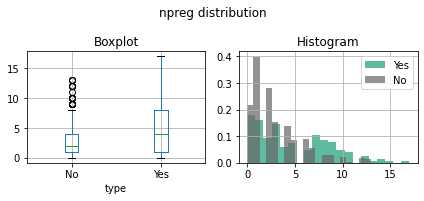

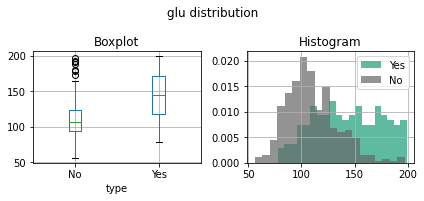

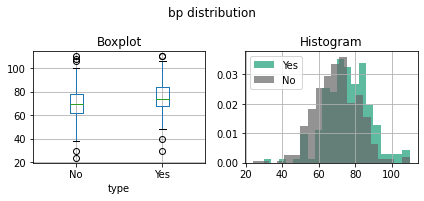

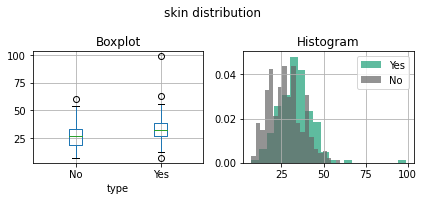

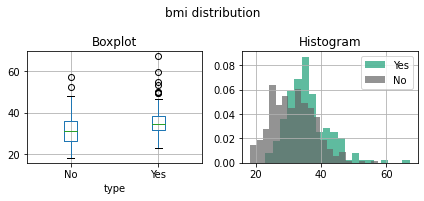

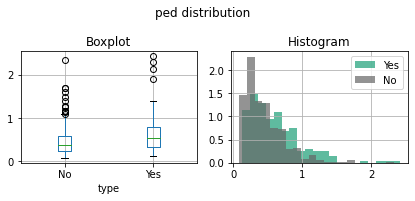

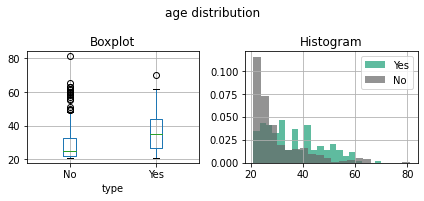

<Figure size 432x288 with 0 Axes>

In [6]:
indVarDistPlots(df,"type",saveName="1",alpha=0.7,density=True,bins=20)

In [7]:
models = [
    da.LinearDiscriminantAnalysis(),
    da.QuadraticDiscriminantAnalysis(),
    nb.GaussianNB(),
    lm.LogisticRegression(dual=False,max_iter=10**6),
    ng.KNeighborsClassifier(),
    svm.SVC()
]
names = [
    "LDA",
    "QDA",
    "Naive Bayes",
    "Logistic",
    "KNC, k=5",
    "SVM"
]
sizes=np.linspace(0.1,1.0,10)

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


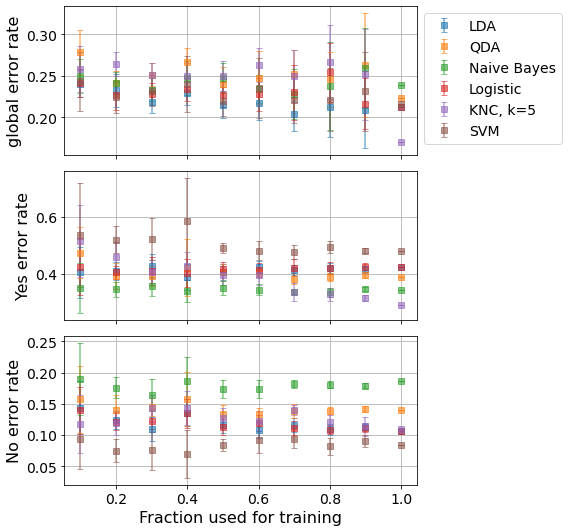

In [8]:
res = errorRatesSizeTable(models,df.drop("type",axis=1),df["type"],sizes=sizes,n=10,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res.to_latex(buf=os.path.join("tarea","1-gen-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res,saveName="1-gen",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


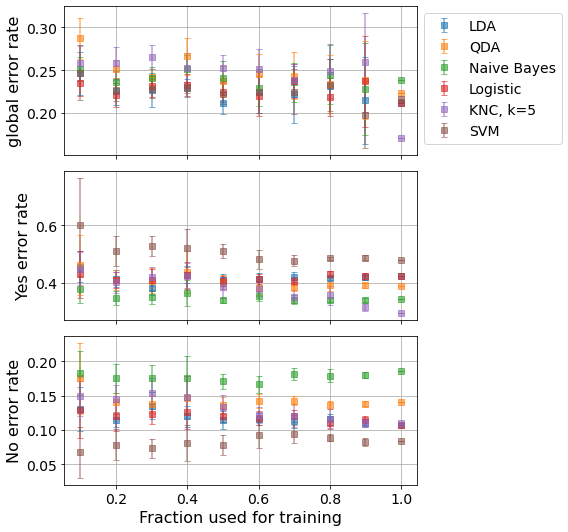

In [9]:
sizes=np.linspace(0.1,1.0,10)
res = errorRatesSizeTable(models,df.drop("type",axis=1),df["type"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res.to_latex(buf=os.path.join("tarea","1-gen-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res,saveName="1-gen-eq",alpha=0.6,capsize=3,marker="s")

In [10]:
transTable = boxcoxLambdaTable(df,"type",alpha=0.05)
tab = "p{4cm}"
for col in transTable.transpose().columns:
    tab += "|p{3cm}"
transTable.transpose().to_latex(buf=os.path.join("tarea","1-bxparam-tab.tex"),float_format="{:0.4f}".format,column_format=tab)

Can't convert column npreg: not entirely positive


In [11]:
transformed = df.copy()
for col in transTable.columns:
    transformed[col] = boxcox(transformed[col],lmbda = transTable[col]["lambda"])

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


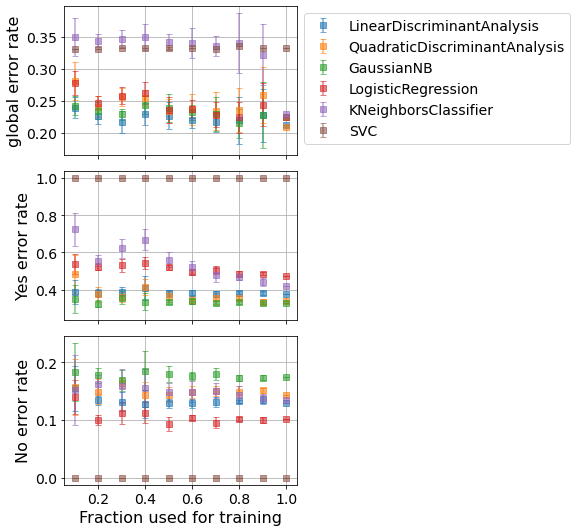

In [12]:
sizes=np.linspace(0.1,1.0,10)
res = errorRatesSizeTable(models,transformed.drop("type",axis=1),transformed["type"],sizes=sizes,n=10,equalRatios=True)
errorRatesSizesPlot(res,saveName="1-boxcox-eq",alpha=0.6,capsize=3,marker="s")

In [86]:
# LDA analysis
mod = da.LinearDiscriminantAnalysis()
col1,col2 = pairInteractionMin(df,"type",mod)

Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
error minimizing interacion: ped*age
Value: 0.2048872180451128


Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


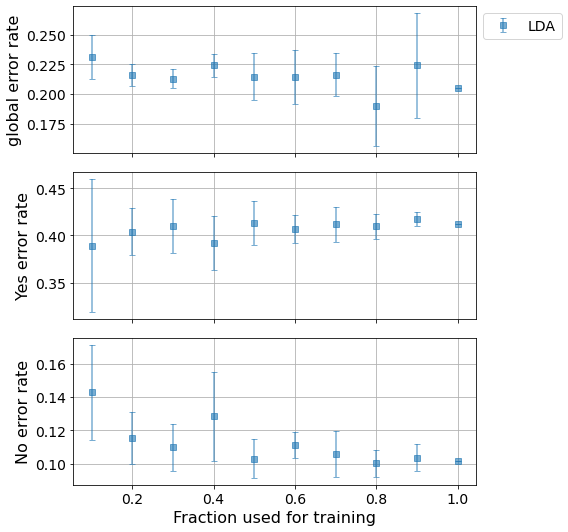

In [87]:
transformed = df.copy()
transformed["pairIter"] = transformed[col1]*transformed[col2]
models = [mod]
names = ["LDA"]
sizes=np.linspace(0.1,1.0,10)
res1 = errorRatesSizeTable(models,transformed.drop("type",axis=1),transformed["type"],sizes=sizes,n=10,equalRatios=True,names = names)
tab = "p{4cm}"
for col in res1.columns:
    tab +="|p{1.5cm}"
res1.to_latex(buf=os.path.join("tarea","1-lda-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res1,saveName="1-lda-eq",alpha=0.6,capsize=3,marker="s")

In [15]:
# Naive Bayes
mod = nb.GaussianNB()
col1,col2 = pairInteractionMin(df,"type",mod)

Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
error minimizing interacion: bp*ped
Value: 0.2199248120300752


Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


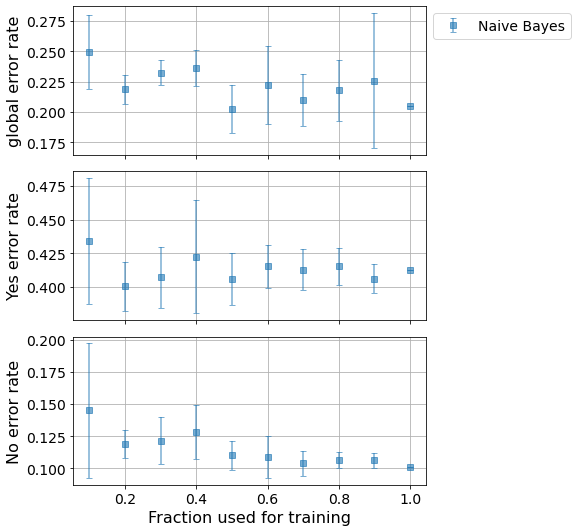

In [88]:
transformed = df.copy()
transformed["bmi*ped"] = transformed[col1]*transformed[col2]
models = [mod]
names = ["Naive Bayes"]
sizes=np.linspace(0.1,1.0,10)
res2 = errorRatesSizeTable(models,transformed.drop("type",axis=1),transformed["type"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res2.columns:
    tab +="|p{1.5cm}"
res2.to_latex(buf=os.path.join("tarea","1-nb-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res2,saveName="1-nb-eq",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


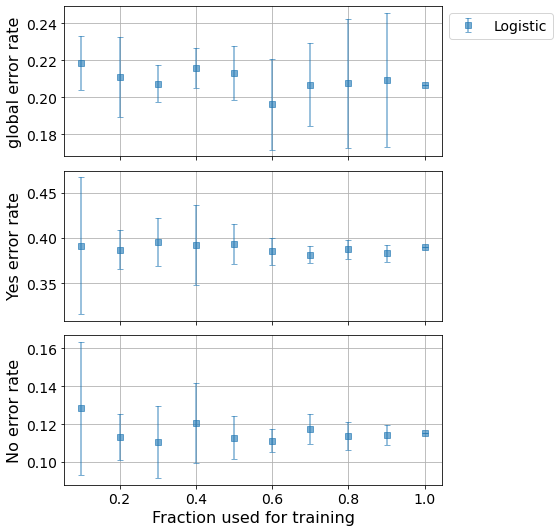

In [90]:
# Logistic regression
transformed = df.copy()
transformed = transformed[["glu","bmi","ped",'age',"type"]]
transformed["age2"] = transformed["age"]*transformed["age"]
models = [lm.LogisticRegression(max_iter=10**6)]
names = ["Logistic"]
sizes=np.linspace(0.1,1.0,10)
res3 = errorRatesSizeTable(models,transformed.drop("type",axis=1),transformed["type"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res3.columns:
    tab +="|p{1.5cm}"
res3.to_latex(buf=os.path.join("tarea","1-log-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res3,saveName="1-log-eq",alpha=0.6,capsize=3,marker="s")

In [91]:
# SVM analysis
models = [
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf",degree=1),
    svm.SVC(kernel="rbf",degree=3),
    svm.SVC(kernel="rbf",degree=5),
    svm.SVC(kernel="poly",degree=1),
    svm.SVC(kernel="poly",degree=3),
    svm.SVC(kernel="poly",degree=5),
]
names = [
    "SVM, kernel = linear",
    "SVM, kernel = rbf, deg = 1",
    "SVM, kernel = rbf, deg = 3",
    "SVM, kernel = rbf, deg = 5",
    "SVM, kernel = poly, deg = 1",
    "SVM, kernel = poly, deg = 3",
    "SVM, kernel = poly, deg = 5"
]

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


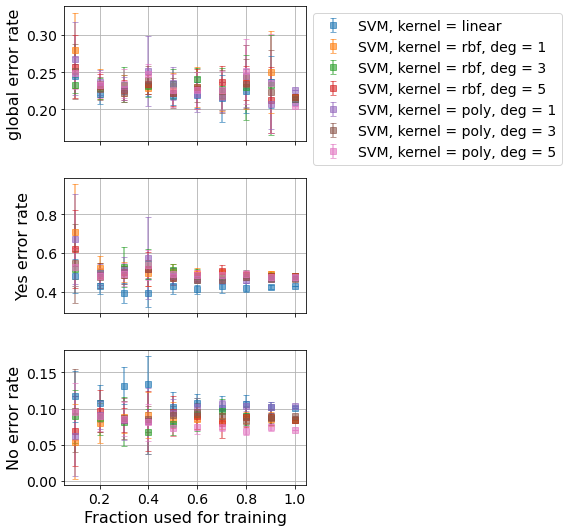

In [92]:
res = errorRatesSizeTable(models,df.drop("type",axis=1),df["type"],sizes=sizes,n=10,names=names)
errorRatesSizesPlot(res,saveName="1-svm",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


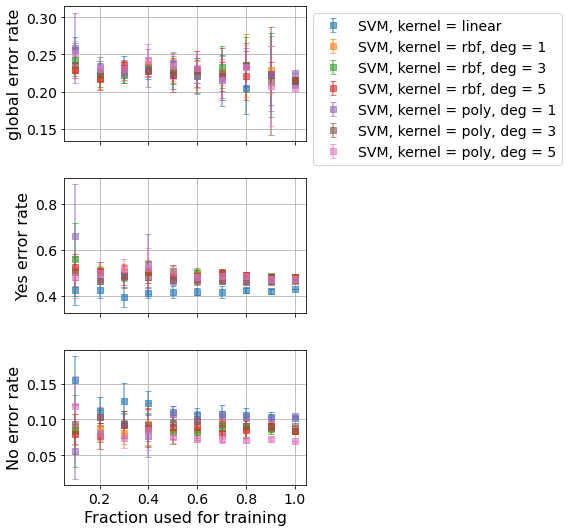

In [93]:
res = errorRatesSizeTable(models,df.drop("type",axis=1),df["type"],sizes=sizes,n=10,names=names,equalRatios=True)
errorRatesSizesPlot(res,saveName="1-svm-eq",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


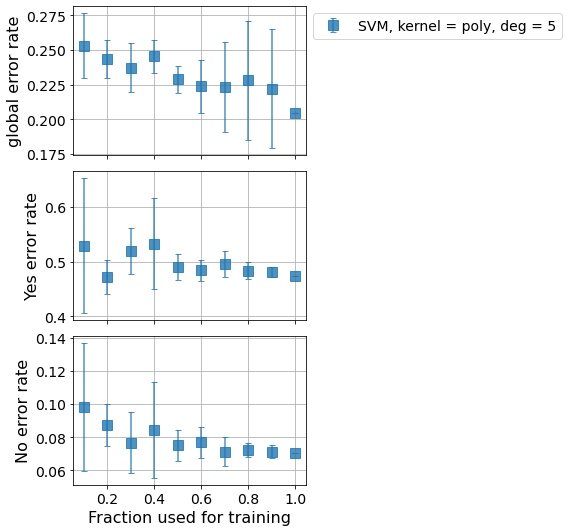

In [94]:
models = [
    svm.SVC(kernel="poly",degree=5)
]
names = [ "SVM, kernel = poly, deg = 5"
]
sizes=np.linspace(0.1,1,10)
res4 = errorRatesSizeTable(models,df.drop("type",axis=1),df["type"],sizes=sizes,n=10,names=names,equalRatios=True)
tab = "p{4cm}"
for col in res4.columns:
    tab +="|p{1.5cm}"
res4.to_latex(buf=os.path.join("tarea","1-svm-fin-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

errorRatesSizesPlot(res4,saveName="1-svm-fin-eq",alpha=0.8,capsize=3,marker="s",markersize=10)

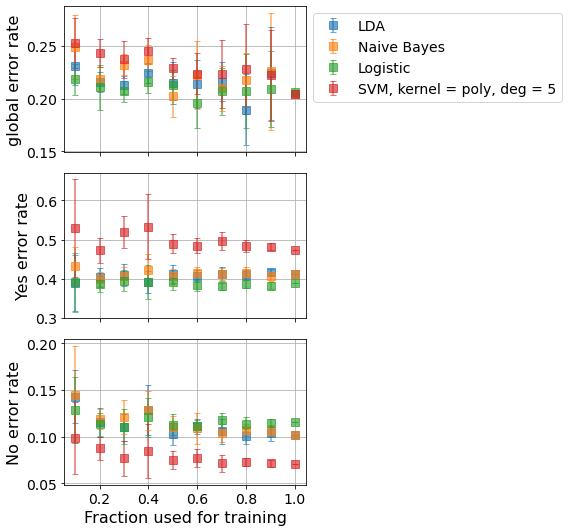

In [95]:
final = pd.concat([res1,res2,res3,res4],axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","1-final-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(final,saveName="1-final",alpha=0.65,capsize=3,marker="s",markersize=8)

In [96]:
neds = [res.iloc[range(0,res.shape[0],2)[-3:],:] for res in [res1,res2,res3,res4]]
final = pd.concat(neds,axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","1-final-correg-aparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [97]:
neds = [res.iloc[range(0,res.shape[0],2)[-12:-9],:] for res in [res1,res2,res3,res4]]
final = pd.concat(neds,axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","1-final-correg-nonaparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [98]:
# Problema 2
df = pd.read_csv("cad1.csv",index_col=0)
print(df.head())

      Sex    AngPec         AMI QWave QWavecode     STcode STchange  \
1    Male      None  NotCertain    No    Usable     Usable       No   
2    Male  Atypical  NotCertain    No    Usable     Usable       No   
3  Female      None    Definite    No    Usable     Usable       No   
4    Male      None  NotCertain    No    Usable  Nonusable       No   
5    Male      None  NotCertain    No    Usable  Nonusable       No   

  SuffHeartF Hypertrophi Hyperchol Smoker Inherit Heartfail CAD  
1         No          No        No     No      No        No  No  
2         No          No        No     No      No        No  No  
3         No          No        No     No      No        No  No  
4         No          No        No     No      No        No  No  
5         No          No        No     No      No        No  No  


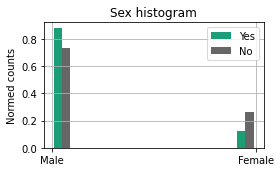

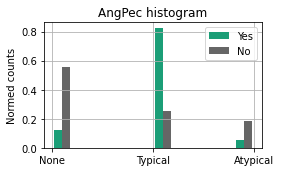

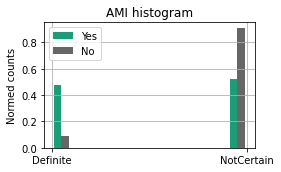

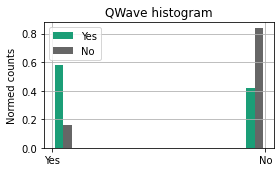

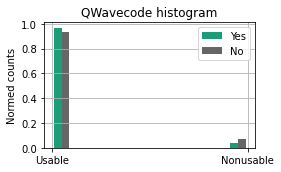

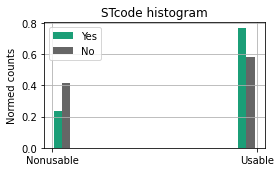

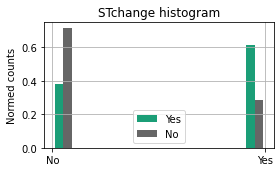

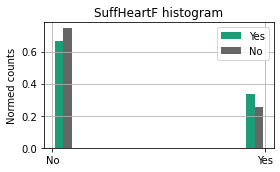

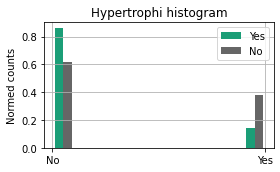

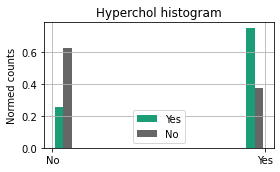

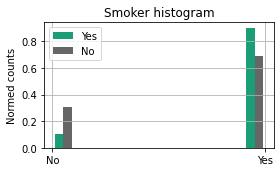

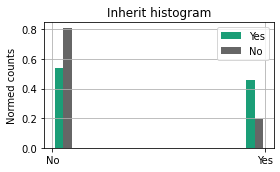

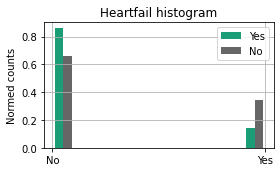

<Figure size 432x288 with 0 Axes>

In [26]:
indVarDistPlots(df,"CAD",saveName="2")

In [27]:
resCol="CAD"
dfCoded = df.copy()
for col in df.columns: 
    if col!=resCol and df[col].dtype==np.dtype("O"):
        dfCoded[col] = df[col].astype("category").cat.codes

In [28]:
dfCoded

Sex  AngPec  AMI  QWave  QWavecode  STcode  STchange  SuffHeartF  \
1      1       1    1      0          1       1         0           0   
2      1       0    1      0          1       1         0           0   
3      0       1    0      0          1       1         0           0   
4      1       1    1      0          1       0         0           0   
5      1       1    1      0          1       0         0           0   
..   ...     ...  ...    ...        ...     ...       ...         ...   
232    1       2    0      1          1       1         1           0   
233    1       2    0      1          0       1         1           0   
234    1       2    1      1          1       1         1           1   
235    1       0    1      0          1       0         0           0   
236    1       2    1      1          1       0         0           0   

     Hypertrophi  Hyperchol  Smoker  Inherit  Heartfail  CAD  
1              0          0       0        0          0   No  
2              0          0       0        0          0   No  
3              0          0       0        0          0   No  
4              0          0       0        0          0   No  
5              0          0       0        0          0   No  
..           ...        ...     ...      ...        ...  ...  
232            0          1       1        1          1  Yes  
233            0          1       1        1          1  Yes  
234            0          1       1        1          1  Yes  
235            1          1       1        1          1  Yes  
236            1          1       1        1          1  Yes  

[236 rows x 14 columns]

In [29]:
models = [
    da.LinearDiscriminantAnalysis(),
    da.QuadraticDiscriminantAnalysis(),
    nb.GaussianNB(),
    lm.LogisticRegression(dual=False,max_iter=10**6),
    ng.KNeighborsClassifier(),
    svm.SVC()
]
names = [
    "LDA",
    "QDA",
    "Naive Bayes",
    "Logistic",
    "KNC, k=5",
    "SVM"
]

Simulating size: 0.1


/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning

Simulating size: 0.2


/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.loca

Simulating size: 0.30000000000000004


/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Simulating size: 0.4


/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Simulating size: 0.5


/home/aldo/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


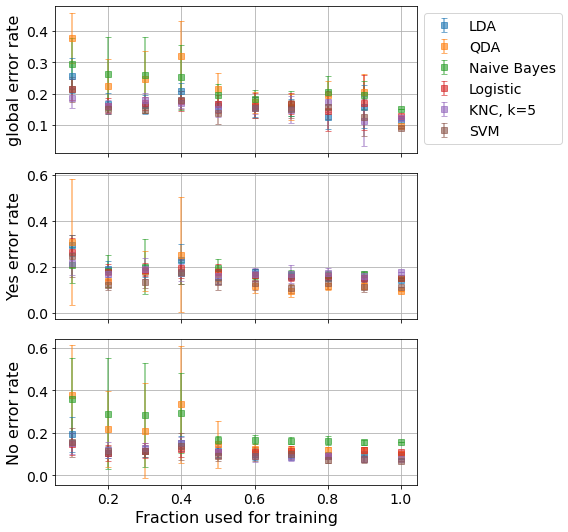

In [30]:
sizes=np.linspace(0.1,1.0,10)
res = errorRatesSizeTable(models,dfCoded.drop("CAD",axis=1),dfCoded["CAD"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res.to_latex(buf=os.path.join("tarea","2-gen-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res,saveName="2-gen-eq",alpha=0.6,capsize=3,marker="s")

In [99]:
# Naive Bayes
mod = nb.GaussianNB()
col1,col2 = pairInteractionMin(dfCoded,"CAD",mod)

Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating size: 1.0
Simulating si

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


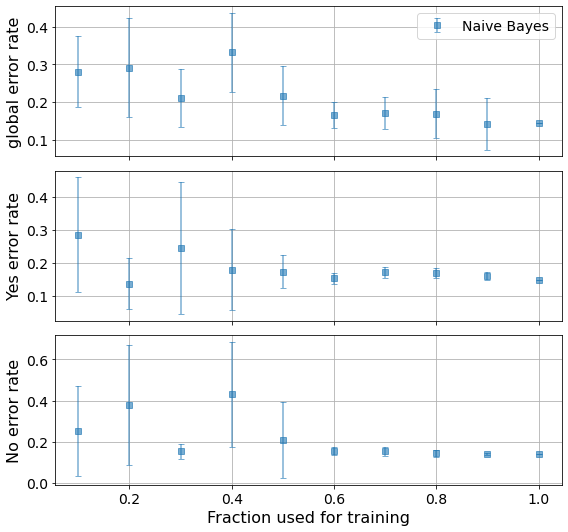

In [100]:
transformed = dfCoded.copy()
transformed["inter"] = transformed[col2]*transformed[col1]
models = [mod]
names = ["Naive Bayes"]
sizes=np.linspace(0.1,1.0,10)
res2 = errorRatesSizeTable(models,transformed.drop("CAD",axis=1),transformed["CAD"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res2.columns:
    tab +="|p{1.5cm}"
res2.to_latex(buf=os.path.join("tarea","2-nb-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res2,saveName="2-nb-eq",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


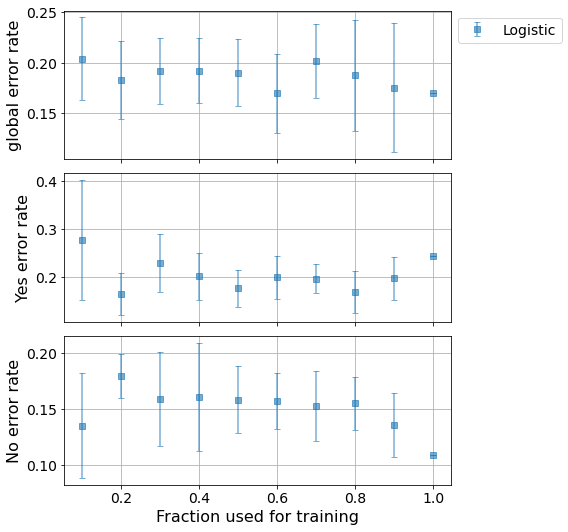

In [101]:
# logistic Regresion
transformed = dfCoded.copy()
transformed = transformed[["AngPec","AMI", "STcode","STchange", "Hyperchol","CAD"]]
models = [lm.LogisticRegression(max_iter=10**6)]
names = ["Logistic"]
sizes=np.linspace(0.1,1.0,10)
res3 = errorRatesSizeTable(models,transformed.drop("CAD",axis=1),transformed["CAD"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res3.columns:
    tab +="|p{1.5cm}"
res3.to_latex(buf=os.path.join("tarea","2-log-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res3,saveName="2-log-eq",alpha=0.6,capsize=3,marker="s")


In [34]:
# SVM analysis
models = [
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf",degree=1),
    svm.SVC(kernel="rbf",degree=3),
    svm.SVC(kernel="rbf",degree=5),
    svm.SVC(kernel="poly",degree=1),
    svm.SVC(kernel="poly",degree=3),
    svm.SVC(kernel="poly",degree=5),
]
names = [
    "SVM, kernel = linear",
    "SVM, kernel = rbf, deg = 1",
    "SVM, kernel = rbf, deg = 3",
    "SVM, kernel = rbf, deg = 5",
    "SVM, kernel = poly, deg = 1",
    "SVM, kernel = poly, deg = 3",
    "SVM, kernel = poly, deg = 5"
]

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


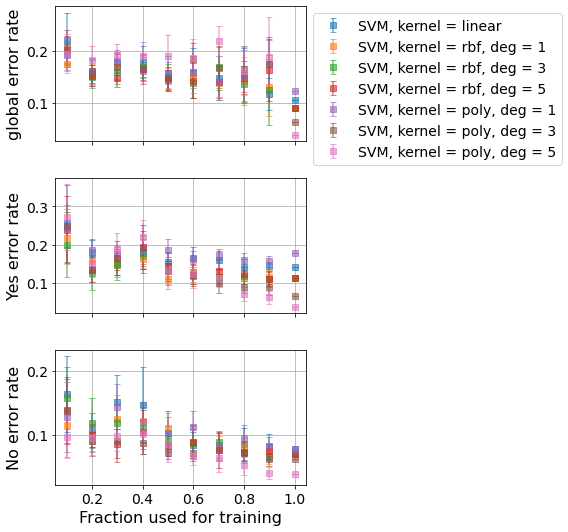

In [35]:
res = errorRatesSizeTable(models,dfCoded.drop("CAD",axis=1),dfCoded["CAD"],sizes=sizes,n=10,names=names,equalRatios=True)
errorRatesSizesPlot(res,saveName="2-svm-eq",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


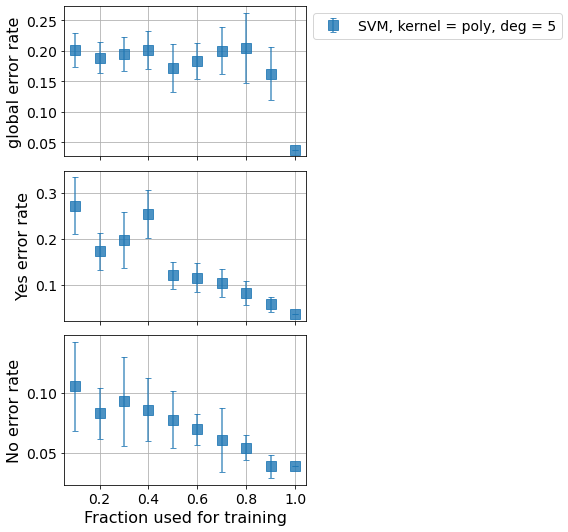

In [103]:
models = [
    svm.SVC(kernel="poly",degree=5)
]
names = [ "SVM, kernel = poly, deg = 5"
]
sizes=np.linspace(0.1,1,10)
res4 = errorRatesSizeTable(models,dfCoded.drop("CAD",axis=1),dfCoded["CAD"],sizes=sizes,n=10,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res4.columns:
    tab +="|p{1.5cm}"
res4.to_latex(buf=os.path.join("tarea","2-svm-fin-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res4,saveName="2-svm-fin-eq",alpha=0.8,capsize=3,marker="s",markersize=10)

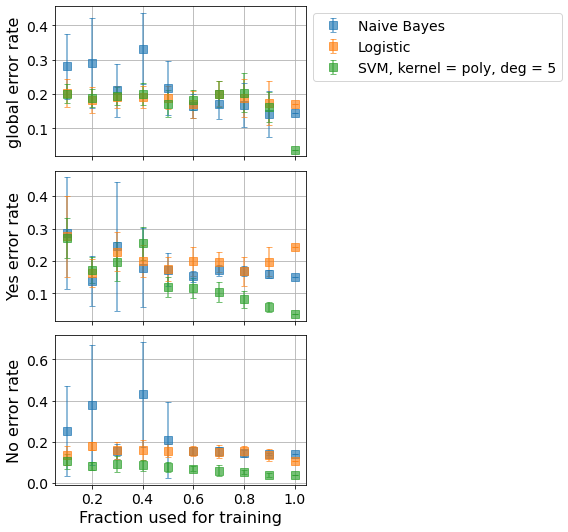

In [104]:
final = pd.concat([res2,res3,res4],axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","2-final-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(final,saveName="2-final",alpha=0.65,capsize=3,marker="s",markersize=8)

In [105]:
neds = [res.iloc[range(0,res.shape[0],2)[-3:],:] for res in [res2,res3,res4]]
final = pd.concat(neds,axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","2-final-correg-aparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [106]:
neds = [res.iloc[range(0,res.shape[0],2)[-12:-9],:] for res in [res2,res3,res4]]
final = pd.concat(neds,axis=1)
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","2-final-correg-nonaparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [181]:
# Problema 3
df = pd.read_csv("Glucose1.txt",index_col="Patient")
df["Class"] = df["Class"].astype("O")
print(df.head())

         Weight  Fglucose  GlucoseInt  InsulinResp  InsulineResist Class
Patient                                                                 
1          0.81        80         356          124              55     3
2          0.95        97         289          117              76     3
3          0.94       105         319          143             105     3
4          1.04        90         356          199             108     3
5          1.00        90         323          240             143     3


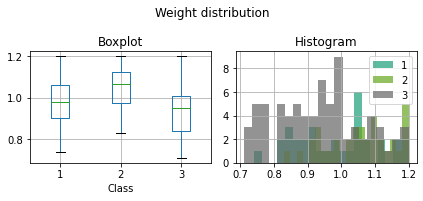

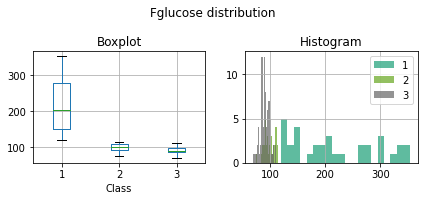

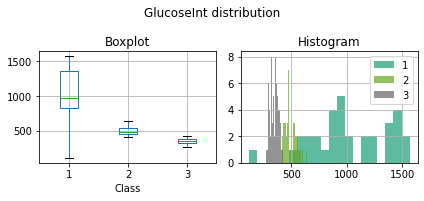

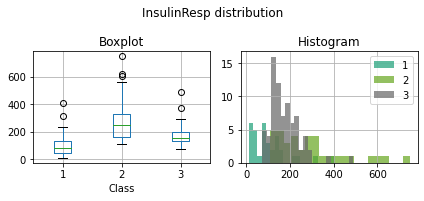

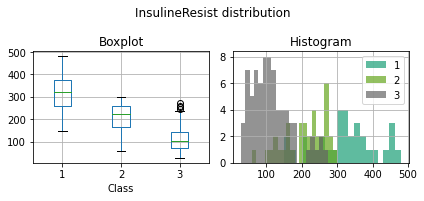

<Figure size 432x288 with 0 Axes>

In [41]:
indVarDistPlots(df,"Class",saveName="3",alpha=0.7,bins = 20)

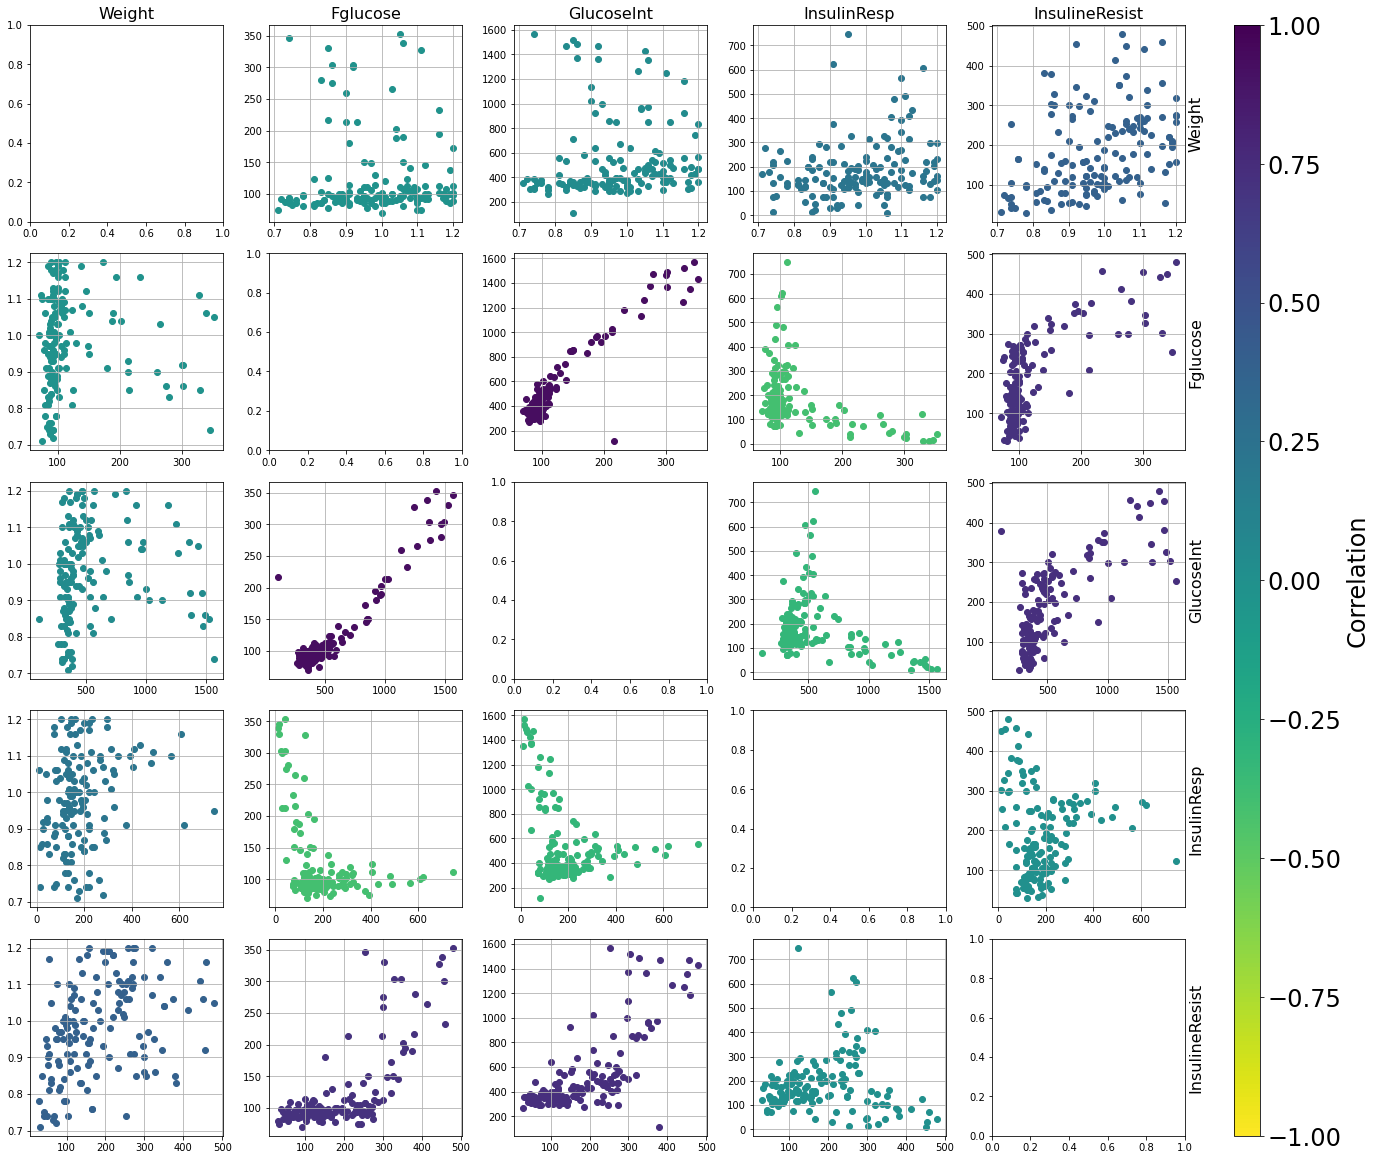

In [42]:
correlationPlots(df,saveName="3")

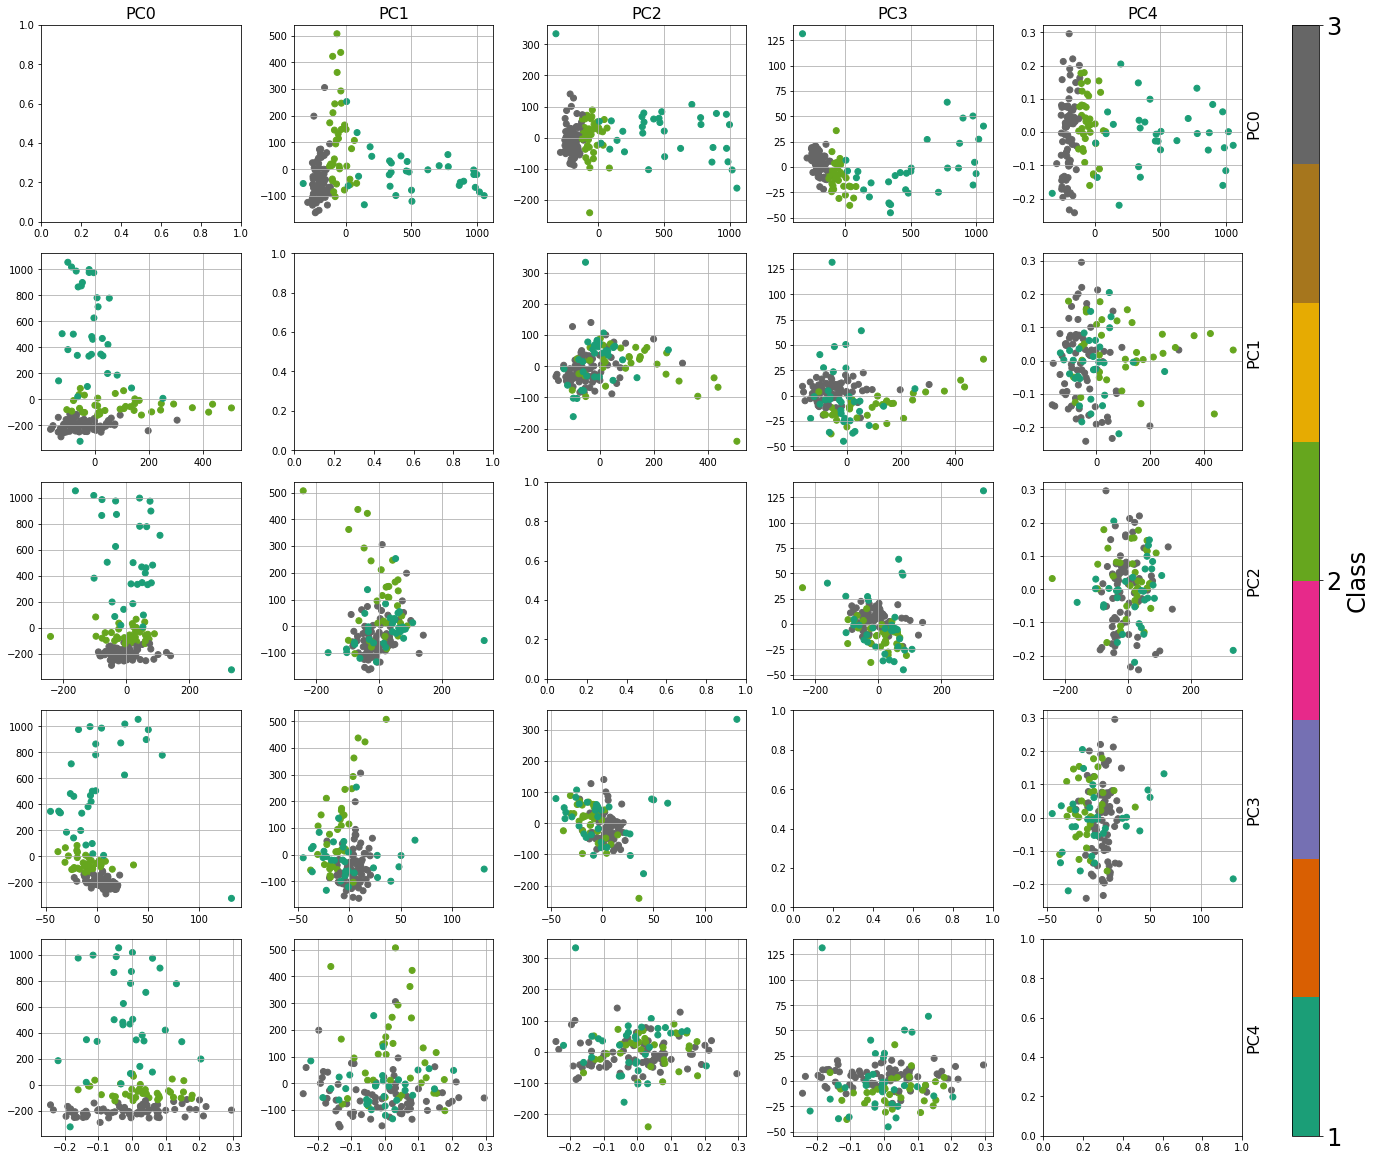

In [43]:
pcaPlots(df.drop("Class",axis=1),df["Class"],saveName="3")

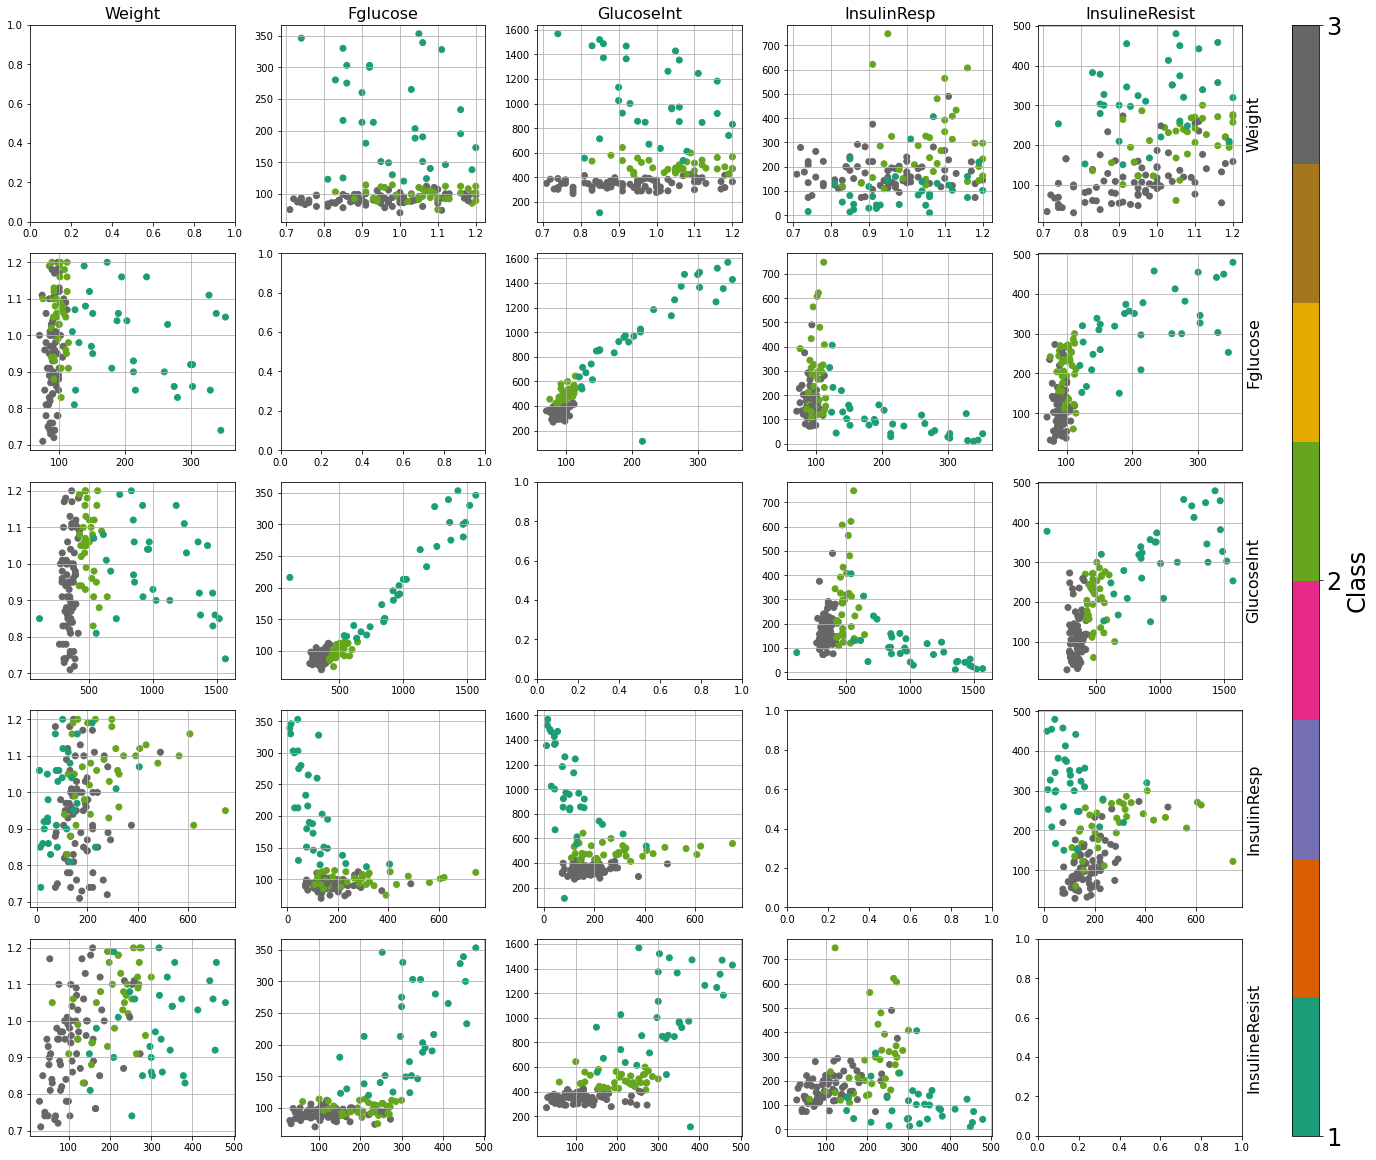

In [44]:
classPlots(df.drop("Class",axis=1),df["Class"],saveName="3")

In [182]:
models = [lm.LogisticRegression(max_iter=10**6,multi_class="ovr"),lm.LogisticRegression(max_iter=10**6,multi_class="multinomial")]
names = ["One-versus-others","multinomial"]
sizes=np.linspace(0.1,1.0,10)

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


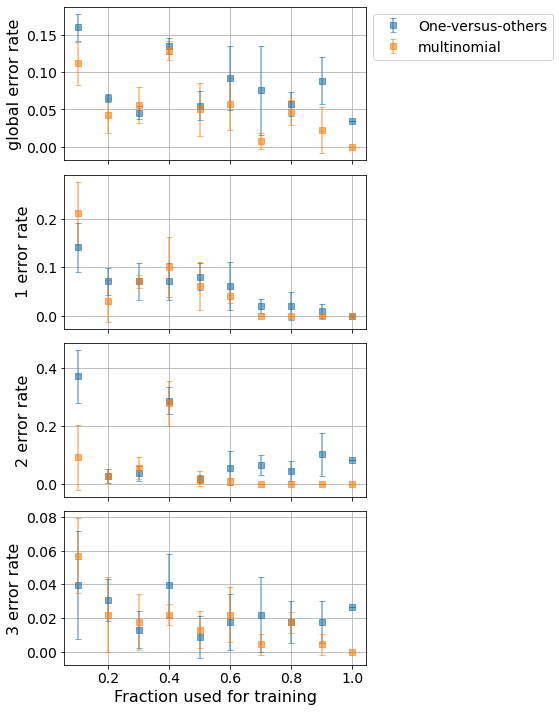

In [183]:
res = errorRatesSizeTable(models,df.drop("Class",axis=1),df["Class"].astype("int64"),sizes=sizes,n=3,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res.to_latex(buf=os.path.join("tarea","3-eq-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res,saveName="3-eq",alpha=0.6,capsize=3,marker="s")

In [186]:
moddescript = df[["Fglucose","GlucoseInt","Class"]].copy()
moddescript["Fglucose^2"] = df["Fglucose"]**2

In [187]:
models = [lm.LogisticRegression(max_iter=10**6,multi_class="ovr")]
names = ["One-versus-others"]
sizes=np.linspace(0.1,1.0,10)

In [188]:
modpredict1 = df[["Fglucose","Class"]].copy()
interactions = ["GlucoseInt*GlucoseInt"]
for inter in interactions:
    columns = inter.split("*")
    modpredict1[inter] = df[columns].product(axis=1)

In [189]:
res1 = errorRatesSizeTable(models,modpredict1.drop("Class",axis=1),modpredict1["Class"].astype("int64"),sizes=sizes,n=20,equalRatios=True,names=names)

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


In [190]:
modpredict2 = df[["InsulinResp","Class"]].copy()
interactions = ["Fglucose*InsulinResp","GlucoseInt*InsulinResp"]
for inter in interactions:
    columns = inter.split("*")
    modpredict2[inter] = df[columns].product(axis=1)

In [191]:
res2 = errorRatesSizeTable(models,modpredict2.drop("Class",axis=1),modpredict2["Class"].astype("int64"),sizes=sizes,n=20,equalRatios=True,names=names)

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


In [192]:
modpredict3 = df[["Fglucose","Class"]].copy()
interactions = ["Weight*InsulineResist", "Fglucose*GlucoseInt", "GlucoseInt*GlucoseInt"]
for inter in interactions:
    columns = inter.split("*")
    modpredict[inter] = df[columns].product(axis=1)

In [193]:
res3 = errorRatesSizeTable(models,modpredict3.drop("Class",axis=1),modpredict3["Class"].astype("int64"),sizes=sizes,n=20,equalRatios=True,names=names)

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


In [194]:
neds = [res.iloc[range(0,res.shape[0],2)[-4:],0] for res in [res1,res2,res3]]
final = pd.concat(neds,axis=1)
final.columns = ["Modelo {0}".format(i) for i in range(1,4)]
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{2cm}"
final.to_latex(buf=os.path.join("tarea","3-descrip-aparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
final

Modelo 1  Modelo 2  Modelo 3
Mean global error, entrenamiento: 1.0  0.117241  0.020690  0.220690
Mean 1 error, entrenamiento: 1.0       0.121212  0.000000  0.000000
Mean 2 error, entrenamiento: 1.0       0.305556  0.055556  0.861111
Mean 3 error, entrenamiento: 1.0       0.026316  0.013158  0.013158

In [195]:
neds = [res.iloc[range(0,res.shape[0],2)[-16:-12],0] for res in [res1,res2,res3]]
final = pd.concat(neds,axis=1)
final.columns = ["Modelo {0}".format(i) for i in range(1,4)]
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{2cm}"
final.to_latex(buf=os.path.join("tarea","3-descrip-nonaparent.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
final

Modelo 1  Modelo 2  Modelo 3
Mean global error, entrenamiento: 0.7  0.139773  0.029545  0.229545
Mean 1 error, entrenamiento: 0.7       0.121212  0.009091  0.001515
Mean 2 error, entrenamiento: 0.7       0.473611  0.062500  0.894444
Mean 3 error, entrenamiento: 0.7       0.005263  0.009868  0.008553

In [196]:
modpredict = modpredict2

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


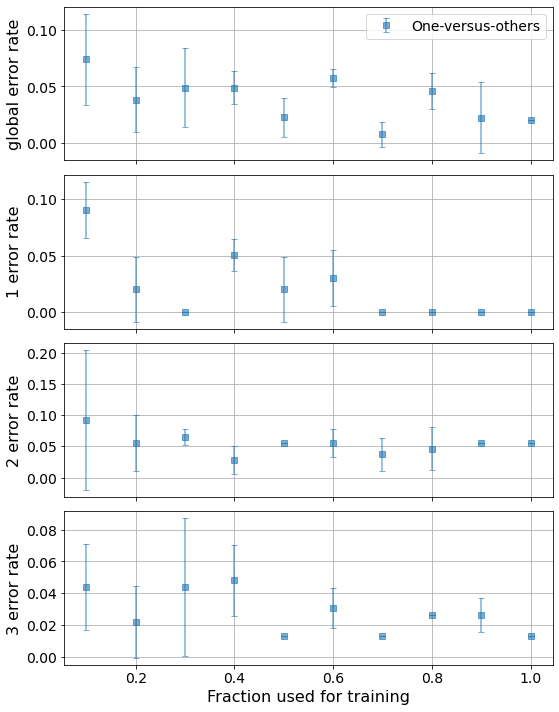

In [197]:
res1 = errorRatesSizeTable(models,moddescript.drop("Class",axis=1),moddescript["Class"].astype("int64"),sizes=sizes,n=3,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res1.to_latex(buf=os.path.join("tarea","3-descrip-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res1,saveName="3-descrip",alpha=0.6,capsize=3,marker="s")

Simulating size: 0.1
Simulating size: 0.2
Simulating size: 0.30000000000000004
Simulating size: 0.4
Simulating size: 0.5
Simulating size: 0.6
Simulating size: 0.7000000000000001
Simulating size: 0.8
Simulating size: 0.9
Simulating size: 1.0


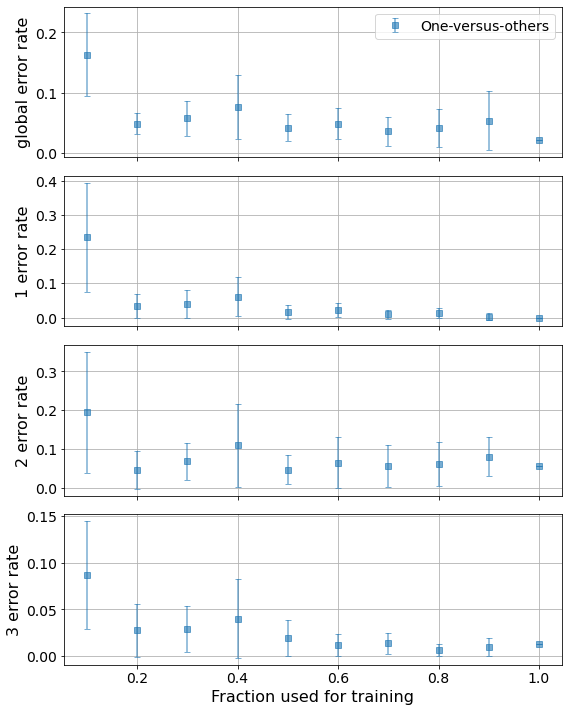

In [198]:
res2 = errorRatesSizeTable(models,modpredict.drop("Class",axis=1),modpredict["Class"].astype("int64"),sizes=sizes,n=20,equalRatios=True,names=names)
tab = "p{4cm}"
for col in res.columns:
    tab +="|p{1.5cm}"
res2.to_latex(buf=os.path.join("tarea","3-predict-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)
errorRatesSizesPlot(res2,saveName="3-predict",alpha=0.6,capsize=3,marker="s")

In [177]:
neds = [res.iloc[range(0,res.shape[0],2)[-4:],0] for res in [res1,res2]]
final = pd.concat(neds,axis=1)
final.columns = ["Descriptivo","Predictivo"]
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{1.5cm}"
final.to_latex(buf=os.path.join("tarea","3-final-correg-aparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [178]:
final

Descriptivo  Predictivo
Mean global error, entrenamiento: 1.0     0.020690    0.020690
Mean 1 error, entrenamiento: 1.0          0.000000    0.000000
Mean 2 error, entrenamiento: 1.0          0.055556    0.055556
Mean 3 error, entrenamiento: 1.0          0.013158    0.013158

In [179]:
neds = [res.iloc[range(0,res.shape[0],2)[-16:-12],0] for res in [res1,res2]]
final = pd.concat(neds,axis=1)
final.columns = ["Descriptivo","Predictivo"]
tab = "p{4cm}"
for col in final.columns:
    tab +="|p{2cm}"
final.to_latex(buf=os.path.join("tarea","3-final-correg-nonaparent-tab.tex"),float_format="{:0.3f}".format,longtable=True,column_format=tab)

In [180]:
final

Descriptivo  Predictivo
Mean global error, entrenamiento: 0.7     0.022727    0.022727
Mean 1 error, entrenamiento: 0.7          0.000000    0.001515
Mean 2 error, entrenamiento: 0.7          0.055556    0.056944
Mean 3 error, entrenamiento: 0.7          0.021930    0.011184